In [1]:
%load_ext autoreload

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s') # NOTSET, DEBUG, INFO, WARN, ERROR, CRITICAL

from JPAS_DA import global_setup
from JPAS_DA.data import loading_tools
from JPAS_DA.data import crossmatch_tools

import numpy as np
import pandas as pd
import os

from JPAS_DA.utils import plotting_utils
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
plt.close('all')
font, rcnew = plotting_utils.matplotlib_default_config()
mpl.rc('font', **font)
plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
%matplotlib widget

In [2]:
root_path = global_setup.DATA_path

In [3]:
# Load DESI data from file 'jpas_idr_classification_xmatch_desi_dr1.fits.gz'
DESI_split = {}
DESI_split = loading_tools.load_DESI_dsets(DESI_split, root_path, global_setup.load_DESI_data)
DESI = loading_tools.concatenate_DESI_splits(DESI_split, merged_pd_key="DESI_pd", merged_np_key="DESI_np")

DESI_Lilianne_split = {}
DESI_Lilianne_split = loading_tools.load_DESI_Lilianne_dsets(
    DESI_Lilianne_split, root_path, global_setup.load_DESI_data_Lilianne, pd_keys=DESI['DESI_pd'].keys()
)
DESI_Lilianne = loading_tools.concatenate_DESI_splits(DESI_Lilianne_split, merged_pd_key="DESI_pd", merged_np_key="DESI_np")

2025-07-18 04:24:02,330 - INFO - ├─── 📥 Starting DESI dataset loading...
2025-07-18 04:24:02,331 - INFO - |    ├─── 🔹 Dataset: train
2025-07-18 04:24:05,532 - INFO - |    |    ✔ CSV loaded ((3450643, 18)), Size: 1414.03 MB
2025-07-18 04:24:05,532 - INFO - |    |    ✔ NPY loaded ((3450643, 57, 3)), Size: 4720.48 MB
2025-07-18 04:24:07,229 - INFO - |    |    ✔ Sample loaded. Final shape: (3450643, 57, 3)
2025-07-18 04:24:07,229 - INFO - |    ├─── 🔹 Dataset: val
2025-07-18 04:24:07,962 - INFO - |    |    ✔ CSV loaded ((739420, 18)), Size: 303.01 MB
2025-07-18 04:24:08,009 - INFO - |    |    ✔ NPY loaded ((739420, 57, 3)), Size: 1011.53 MB
2025-07-18 04:24:08,362 - INFO - |    |    ✔ Sample loaded. Final shape: (739420, 57, 3)
2025-07-18 04:24:08,363 - INFO - |    ├─── 🔹 Dataset: test
2025-07-18 04:24:09,008 - INFO - |    |    ✔ CSV loaded ((739435, 18)), Size: 303.01 MB
2025-07-18 04:24:09,018 - INFO - |    |    ✔ NPY loaded ((739435, 57, 3)), Size: 1011.55 MB
2025-07-18 04:24:09,376 - IN

In [4]:
labels_uniques_DESI, counts_uniques_DESI = np.unique(DESI['DESI_pd']["TARGETID"], return_counts=True)
labels_uniques_DESI_Lilianne, counts_uniques_DESI_Lilianne = np.unique(DESI_Lilianne['DESI_pd']["TARGETID"], return_counts=True)

print()
print("Number of unique TARGETIDs DESI:", len(labels_uniques_DESI))
print("Total number of objects with unique TARGETIDs DESI (TARGETIDs might be repeated):", np.sum(counts_uniques_DESI))
print()
print("Number of unique TARGETIDs DESI-Lilianne:", len(labels_uniques_DESI_Lilianne))
print("Total number of objects with unique TARGETIDs DESI-Lilianne (TARGETIDs might be repeated):", np.sum(counts_uniques_DESI_Lilianne))


Number of unique TARGETIDs DESI: 1595965
Total number of objects with unique TARGETIDs DESI (TARGETIDs might be repeated): 4929498

Number of unique TARGETIDs DESI-Lilianne: 1410685
Total number of objects with unique TARGETIDs DESI-Lilianne (TARGETIDs might be repeated): 4361754


In [5]:
IDs_only_1, IDs_only_2, IDs_both, idxs_only_1, idxs_only_2, idxs_both_1, idxs_both_2 = crossmatch_tools.crossmatch_IDs_two_datasets(
    DESI['DESI_pd']["TARGETID"], DESI_Lilianne['DESI_pd']["TARGETID"]
)
print("Number of unique TARGETIDs only in 1:", len(IDs_only_1))
print("Number of unique TARGETIDs only in 2:", len(IDs_only_2))
print("Number of unique TARGETIDs both in 1 & 2:", len(IDs_both))
if len(IDs_only_1) > 0:
    print("Total number of objects from 1, TARGETID only in 1 (TARGETIDs might be repeated):", len(np.concatenate(idxs_only_1)))
if len(IDs_only_2) > 0:
    print("Total number of objects from 2, TARGETID only in 2 (TARGETIDs might be repeated):", len(IDs_only_2))
if len(IDs_both) > 0:
    print("Total number of objects from 1, TARGETID both in 1 & 2 (TARGETIDs might be repeated):", len(IDs_both))
    print("Total number of objects from 2, TARGETID both in 1 & 2 (TARGETIDs might be repeated):", len(IDs_both))

2025-07-18 04:24:31,308 - INFO - 🔍 crossmatch_IDs_two_datasets()...
2025-07-18 04:24:31,309 - INFO - ├── 🚀 Starting ID categorization process...
2025-07-18 04:24:31,755 - INFO - |    ├── 📌 Found 1595965 unique IDs across 2 arrays.
2025-07-18 04:24:33,736 - INFO - |    ├── Presence matrix created with shape: (2, 1595965)
2025-07-18 04:24:33,743 - INFO - |    ├── Category mask created with shape: (2, 1595965)
2025-07-18 04:24:33,743 - INFO - ├── 🚀 Starting index retrieval process...
2025-07-18 04:24:33,743 - INFO - |    ├── 📌 Processing 1595965 unique IDs across 2 arrays.
2025-07-18 04:24:34,986 - INFO - ├── 🚀 Starting post-processing of unique IDs across two arrays...
2025-07-18 04:24:35,023 - INFO - |    ├── Processing complete: 185280 IDs only in Array 1 (11.61%).
2025-07-18 04:24:35,024 - INFO - |    ├── Processing complete: 0 IDs only in Array 2 (0.0%).
2025-07-18 04:24:35,024 - INFO - |    ├── Processing complete: 1410685 IDs in both arrays (88.39%).
2025-07-18 04:24:35,024 - INFO 

Number of unique TARGETIDs only in 1: 185280
Number of unique TARGETIDs only in 2: 0
Number of unique TARGETIDs both in 1 & 2: 1410685
Total number of objects from 1, TARGETID only in 1 (TARGETIDs might be repeated): 567744
Total number of objects from 1, TARGETID both in 1 & 2 (TARGETIDs might be repeated): 1410685
Total number of objects from 2, TARGETID both in 1 & 2 (TARGETIDs might be repeated): 1410685


In [6]:
DESI_Lilianne_flux = 10**((DESI_Lilianne['DESI_np'] - 22.50)/-2.5)

TARGETID 39628362666213966
[         nan 125.58475238 122.43453781 100.91858386  78.68532689
 111.53430117 131.62466919 125.17395441 136.64057858 110.05564626
 129.32257688          nan 191.95641603 213.53346298 224.23484217
 203.04270143 195.95030596 209.28549631 220.13267386          nan
 271.52070751          nan 234.16045331 228.77026835 224.753422
 235.90127728 224.82628507 249.87595461 266.17740036          nan
 254.06318045          nan 247.63551406 238.6318393  267.34684328
 245.0139652  251.03292426 234.56092753 254.73000847          nan
 240.56906872          nan          nan 244.33728184 247.57506743
 236.58954364 233.45714602 247.77080707 237.24811877          nan
 205.67226864          nan 225.9645438  222.44274098 227.55577183
          nan 243.80861616]
[         nan 117.92391874  81.23163298  86.03694972  60.53484572
  61.74145557 104.63146322  88.81090226  93.10647617 107.92901255
 116.05228144 118.83540193 128.48235674 164.13366762 170.88981065
 147.34127026 145.56975

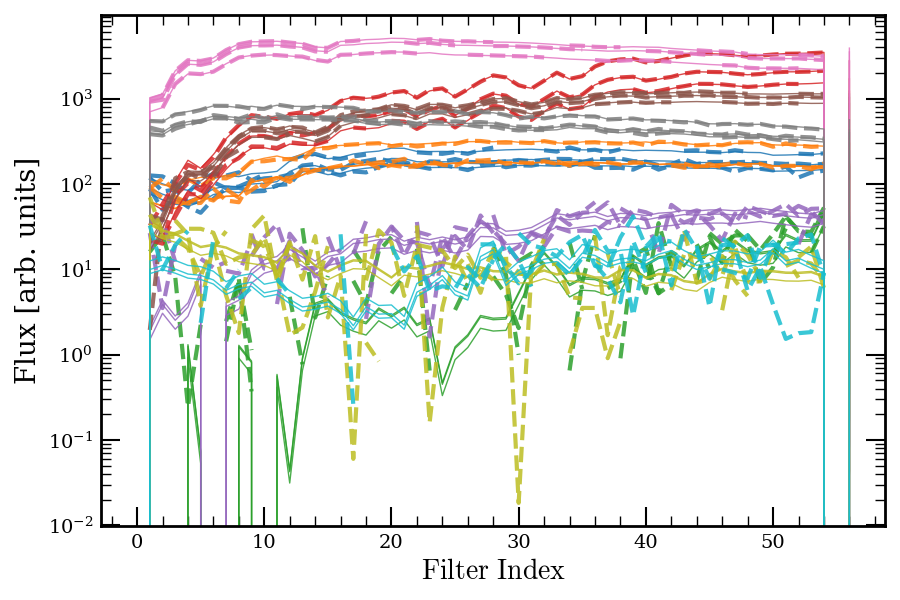

In [7]:
NN_plot_both = 10
LoA_indices_plot = np.random.choice(np.arange(len(idxs_both_1)), NN_plot_both, replace=False)

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xlabel(r'$\mathrm{Filter~Index}$', fontsize=20)
ax.set_ylabel(r'Flux [arb. units]', fontsize=20)

colors = plotting_utils.get_N_colors(NN_plot_both, colormap=plt.cm.tab10)  
for ii, LoA_idx in enumerate(LoA_indices_plot):

    tmp_TARGETID = IDs_both[LoA_idx]
    print("TARGETID", tmp_TARGETID)

    tmp_indices = idxs_both_1[LoA_idx]
    for jj, tmp_idx in enumerate(tmp_indices):
        assert DESI['DESI_pd']["TARGETID"][tmp_idx] == tmp_TARGETID, "TARGETID mismatch DESI"
        tmp_obs = DESI['DESI_np'][tmp_idx][..., 0]
        ax.plot(np.arange(len(tmp_obs)), tmp_obs, color=colors[ii], ls='-', lw=1, alpha=0.85)

    tmp_indices = idxs_both_2[LoA_idx]
    for jj, tmp_idx in enumerate(tmp_indices):
        assert DESI_Lilianne['DESI_pd']["TARGETID"][tmp_idx] == tmp_TARGETID, "TARGETID mismatch DESI-Lillianne"
        # tmp_obs = DESI_Lilianne['DESI_np'][tmp_idx][..., 0]
        tmp_obs = DESI_Lilianne_flux[tmp_idx][..., 0]
        print(tmp_obs)
        ax.plot(np.arange(len(tmp_obs)), tmp_obs, color=colors[ii], ls='--', lw=3, alpha=0.85)

# Adjust tick label size
ax.tick_params(axis='both', labelsize=14)

# Y scale and plot style
ax.set_yscale("log")

plt.tight_layout()
plt.show()